# Model Evaluation

This notebook is the fourth of five notebooks containing the central work for the project.

This notebook contains the evaluation of every used classifier.

In [ ]:
# Google Drive connection to your compute instance
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import os

# classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# model selection
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# result storage
import pickle
from pathlib import Path

# Multilayer Perceptron

In [ ]:
res_path = "/content/drive/My Drive/Spotify Song Classification/data/results/estimators/Multilayer Perceptron/0.65606_Multilayer Perceptron_NoOutlierHandling_StandardScaling_BinningFalse_FeatureSelectionFalse.result"

with open(res_path, "rb") as f:
  result = pickle.load(f)

estimator = result["grid"]

display(estimator)

MLPClassifier(activation='relu', alpha=0.35, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=250,
              momentum=0.9, n_iter_no_change=15, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_StandardScaling_BinningFalse_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_StandardScaling_BinningFalse_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
labels = list(set(y_test["genre"]))

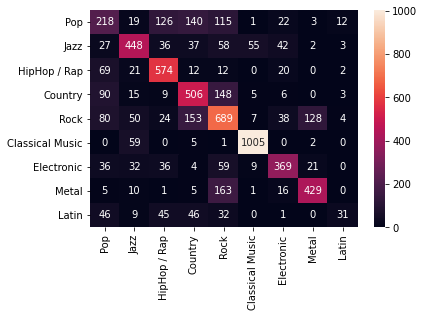

In [ ]:
y_pred = estimator.predict(x_test)
cnf = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

In [ ]:
y_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_StandardScaling_BinningFalse_FeatureSelectionFalse/y_train.csv").drop("Unnamed: 0", axis=1)
x_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_StandardScaling_BinningFalse_FeatureSelectionFalse/x_train.csv").drop("Unnamed: 0", axis=1)

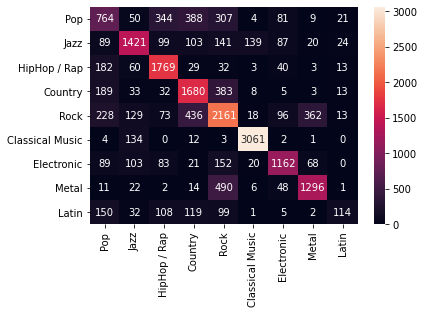

In [ ]:
y_pred = estimator.predict(x_train)
cnf = confusion_matrix(y_train, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

# Random Forest

In [ ]:
res_path = "/content/drive/My Drive/Spotify Song Classification/data/results/estimators/Random Forest/0.67450_Random Forrest_NoOutlierHandling_RobustScaling_BinningFalse_FeatureSelectionFalse.result"

with open(res_path, "rb") as f:
  result = pickle.load(f)

estimator = result["grid"]

In [ ]:
y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_RobustScaling_BinningFalse_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_RobustScaling_BinningFalse_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
#y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_MinMaxScaling_BinningFalse_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
#x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_MinMaxScaling_BinningFalse_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
labels = list(set(y_test["genre"]))

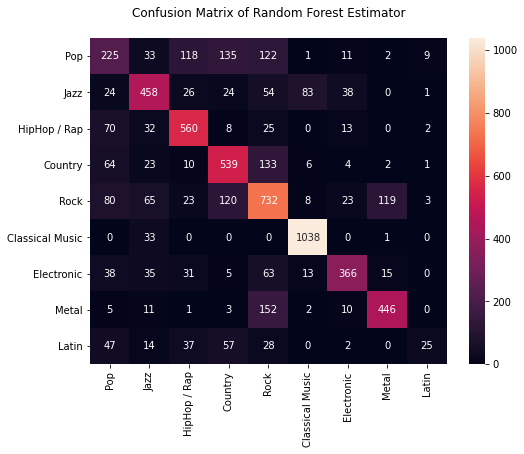

In [ ]:
y_pred = estimator.predict(x_test)
cnf = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))

sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

plt.title("Confusion Matrix of Random Forest Estimator\n")
plt.xlabel = "Predicted"
plt.ylabel = "Actual"
plt.show()

In [ ]:
### Check with Training Data
y_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_RobustScaling_BinningFalse_FeatureSelectionFalse/y_train.csv").drop("Unnamed: 0", axis=1)
x_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/NoOutlierHandling_RobustScaling_BinningFalse_FeatureSelectionFalse/x_train.csv").drop("Unnamed: 0", axis=1)

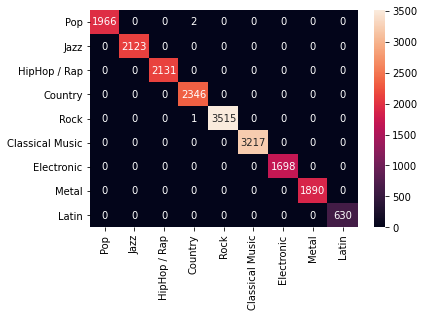

In [ ]:
y_pred = estimator.predict(x_train)
cnf = confusion_matrix(y_train, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

# Decision Tree

In [ ]:
res_path = "/content/drive/My Drive/Spotify Song Classification/data/results/estimators/Decision Tree/0.60258_Decision Tree_Clipping5_Percentile_NoScaling_Binning10_FeatureSelectionFalse.result"

with open(res_path, "rb") as f:
  result = pickle.load(f)

estimator = result["grid"]

In [ ]:
y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
labels = list(set(y_test["genre"]))

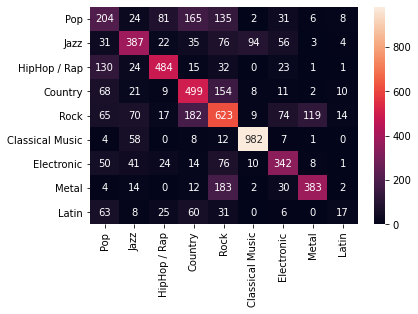

In [ ]:
y_pred = estimator.predict(x_test)
cnf = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

In [ ]:
y_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/y_train.csv").drop("Unnamed: 0", axis=1)
x_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/x_train.csv").drop("Unnamed: 0", axis=1)

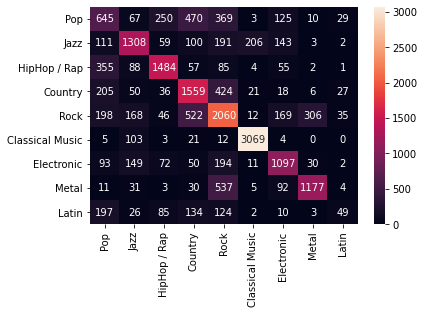

In [ ]:
y_pred = estimator.predict(x_train)
cnf = confusion_matrix(y_train, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

# K-Neighbors

In [ ]:
res_path = "/content/drive/My Drive/Spotify Song Classification/data/results/estimators/kNN/knn0.64192.result"

with open(res_path, "rb") as f:
  result = pickle.load(f)

estimator = result

In [ ]:
y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
labels = list(set(y_test["genre"]))

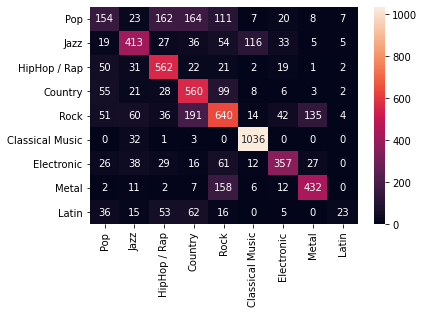

In [ ]:
y_pred = estimator.predict(x_test)
cnf = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

In [ ]:
y_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/y_train.csv").drop("Unnamed: 0", axis=1)
x_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/Clipping5%Percentile_NoScaling_Binning10_FeatureSelectionFalse/x_train.csv").drop("Unnamed: 0", axis=1)

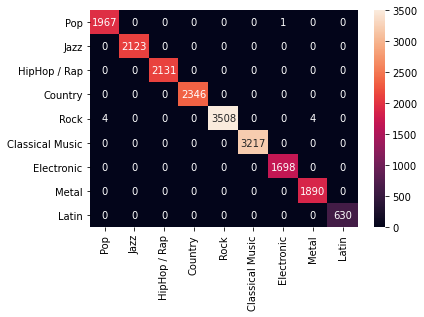

In [ ]:
y_pred = estimator.predict(x_train)
cnf = confusion_matrix(y_train, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

# Logistic Regression

In [ ]:
res_path = "/content/drive/My Drive/Spotify Song Classification/data/results/estimators/Logistic Regression/0.62410_Logistic Regression_ClippingIQR_NoScaling_Binning10_FeatureSelectionFalse.result"

with open(res_path, "rb") as f:
  result = pickle.load(f)

estimator = result["grid"]

In [ ]:
y_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/ClippingIQR_NoScaling_Binning10_FeatureSelectionFalse/y_test.csv").drop("Unnamed: 0", axis=1)
x_test = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/ClippingIQR_NoScaling_Binning10_FeatureSelectionFalse/x_test.csv").drop("Unnamed: 0", axis=1)
labels = list(set(y_test["genre"]))

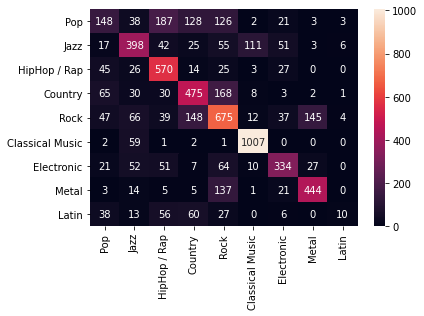

In [ ]:
y_pred = estimator.predict(x_test)
cnf = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")

In [ ]:
y_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/ClippingIQR_NoScaling_Binning10_FeatureSelectionFalse/y_train.csv").drop("Unnamed: 0", axis=1)
x_train = pd.read_csv("/content/drive/My Drive/Spotify Song Classification/data/preprocessed/ClippingIQR_NoScaling_Binning10_FeatureSelectionFalse/x_train.csv").drop("Unnamed: 0", axis=1)

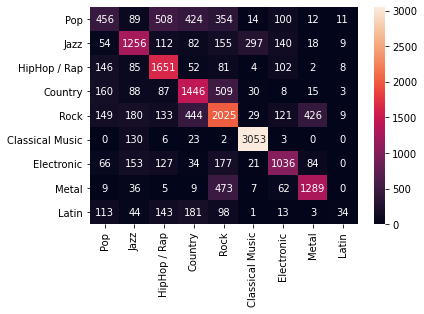

In [ ]:
y_pred = estimator.predict(x_train)
cnf = confusion_matrix(y_train, y_pred,  labels=labels)
sns.heatmap(cnf, annot=True, xticklabels=labels, yticklabels=labels, fmt="g")